# Noise Smoothing

In [4]:
import pandas as pd
import numpy as np


In [5]:
n=200
df = pd.DataFrame(np.random.randint(0,100,size=(n,1)), columns = list('T'))
print(df)

      T
0    20
1    68
2    28
3    36
4    37
5    34
6    37
7    29
8    13
9     0
10   88
11   82
12    7
13   23
14   14
15   44
16   27
17   81
18   32
19   32
20   52
21   93
22   65
23   55
24   61
25   48
26   16
27   52
28   45
29   18
..   ..
170  36
171  82
172  62
173  51
174  44
175  75
176  13
177  99
178  60
179  40
180  57
181  55
182  20
183  30
184  98
185  88
186   1
187  42
188  85
189  27
190  57
191  18
192  12
193  76
194  57
195  99
196  70
197  12
198  95
199   0

[200 rows x 1 columns]


## Equal Width Binning

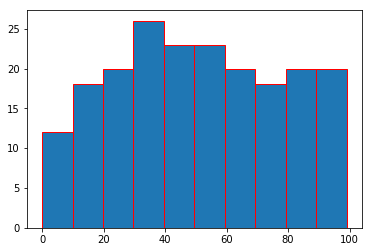

Bins
[ 0.   9.9 19.8 29.7 39.6 49.5 59.4 69.3 79.2 89.1 99. ]


In [11]:
import matplotlib.pyplot as plt
hist = plt.hist(df['T'], ec="red")
plt.show()
print("Bins")
print(hist[1])

In [12]:
df2 = df.copy()
df3 = df.copy()

In [13]:
#pd.cut(np.array(df2['T']),10)

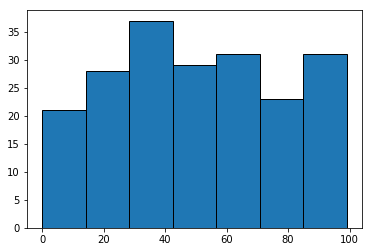

Bins
[ 0.         14.14285714 28.28571429 42.42857143 56.57142857 70.71428571
 84.85714286 99.        ]


In [19]:
#Scott
hist = plt.hist(np.array(df['T']),bins ='scott',ec="black")
plt.show()
print("Bins")
print(hist[1])

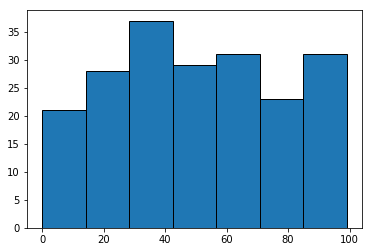

Bins
[ 0.         14.14285714 28.28571429 42.42857143 56.57142857 70.71428571
 84.85714286 99.        ]


In [21]:
#Freedman Diaconis Estimator
hist = plt.hist(np.array(df['T']),bins="fd",ec="black")
plt.show()
print("Bins")
print(hist[1])

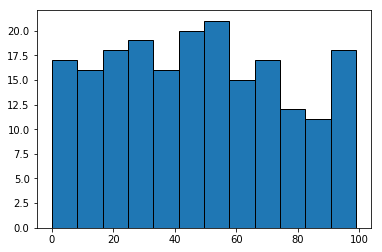

Bins
[ 0.    8.25 16.5  24.75 33.   41.25 49.5  57.75 66.   74.25 82.5  90.75
 99.  ]


In [10]:
#Rice
hist = plt.hist(np.array(df['T']),bins="rice",ec="black")
plt.show()
print("Bins")
print(hist[1])

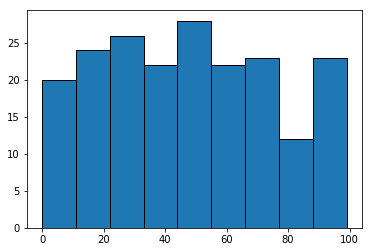

Bins
[ 0. 11. 22. 33. 44. 55. 66. 77. 88. 99.]


In [11]:
#Sturges
hist = plt.hist(np.array(df['T']),bins="sturges",ec="black")
plt.show()
print("Bins")
print(hist[1])

In [12]:
import math
import statistics

def sturge(n):
    k = 1 + 3.222 * math.log10(n)
    return k

def scott(a, n):
    stddev = statistics.stdev(a)
    k = 3.49 * stddev * (n**(-1/3))
    return k

def rice(n):
    k = 2 * n**(1/3)
    return k 

def freedman(a, n):
    iqr = a.quantile()
    k = (2 * iqr)/(n**(1/3))
    return k

In [13]:
sturge(n)

8.413918646029348

In [14]:
scott(df['T'],n)

16.674949774357373

In [15]:
rice(n)

11.696070952851462

In [16]:
freedman(df['T'],n)

16.073773898760955

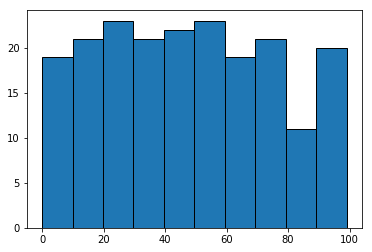

Bins
[ 0.   9.9 19.8 29.7 39.6 49.5 59.4 69.3 79.2 89.1 99. ]


In [17]:
hist = plt.hist(df['T'], ec="black", density=False)
plt.show()
print("Bins")
print(hist[1])

## Equal Depth Binning

### Each bin having a depth 20(10% of observations)

In [23]:
mylist = np.array(df['T'])
mylist
mylist.sort()
mylist

array([ 0,  0,  0,  0,  1,  1,  3,  3,  6,  7,  7,  7, 12, 12, 12, 12, 13,
       13, 13, 14, 14, 16, 16, 16, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21,
       22, 22, 23, 23, 23, 23, 23, 24, 25, 26, 26, 27, 27, 27, 28, 29, 30,
       30, 31, 32, 32, 32, 33, 34, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37,
       37, 37, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 41, 42, 42, 42, 42,
       42, 43, 43, 44, 44, 44, 44, 45, 45, 45, 46, 46, 48, 49, 51, 51, 52,
       52, 52, 52, 53, 53, 54, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 57,
       57, 58, 58, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 63, 63, 65, 65,
       66, 66, 68, 68, 68, 69, 70, 70, 70, 70, 71, 72, 73, 73, 73, 73, 75,
       75, 76, 76, 77, 77, 77, 77, 81, 81, 82, 82, 82, 82, 82, 84, 84, 85,
       85, 86, 86, 87, 87, 88, 88, 88, 88, 89, 90, 90, 92, 93, 93, 93, 94,
       95, 95, 95, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99])

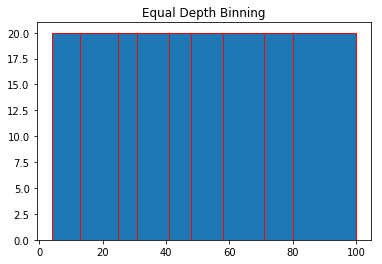

10
10
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[14, 14, 23, 35, 41, 51, 58, 68, 81, 90]


In [24]:
x=[]
y=[]
for i in range(0,200,20):
    x.append(20)
    k = mylist[i]
    for j in range(20):
        if(k<mylist[j]):
            k = mylist[j]
    y.append(k) 
    

plt.bar(y,x,edgecolor='r',width=20)
plt.title("Equal Depth Binning")
plt.show()
print(len(x))
print(len(y))
print(x)
print(y)